## k-NN Regression

In [1]:
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

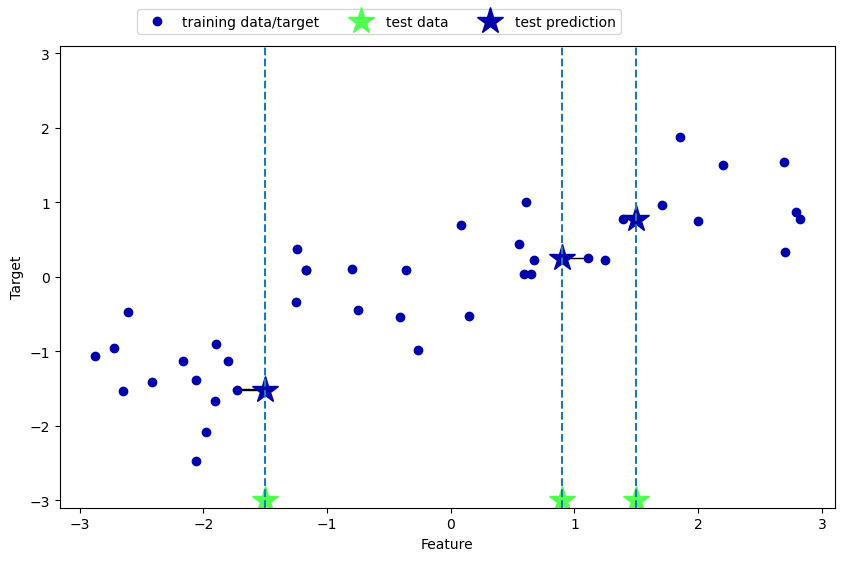

In [2]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

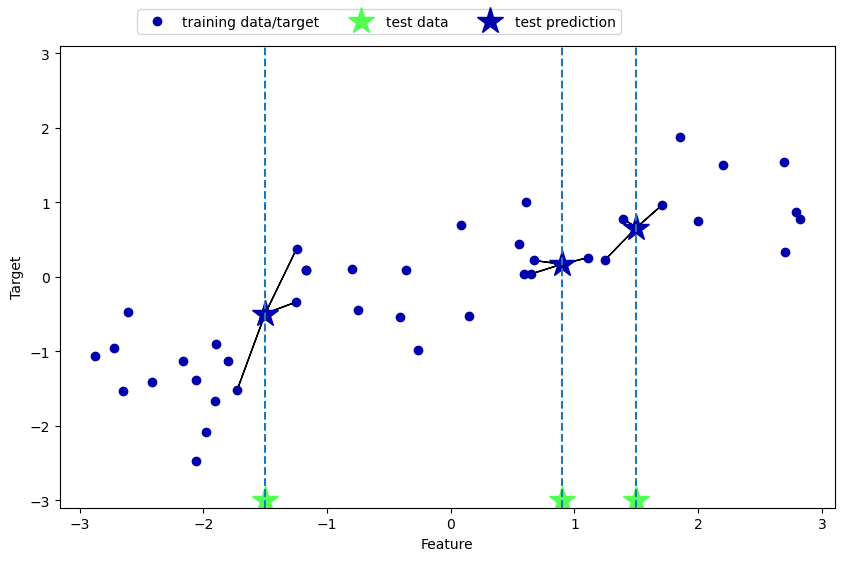

In [3]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

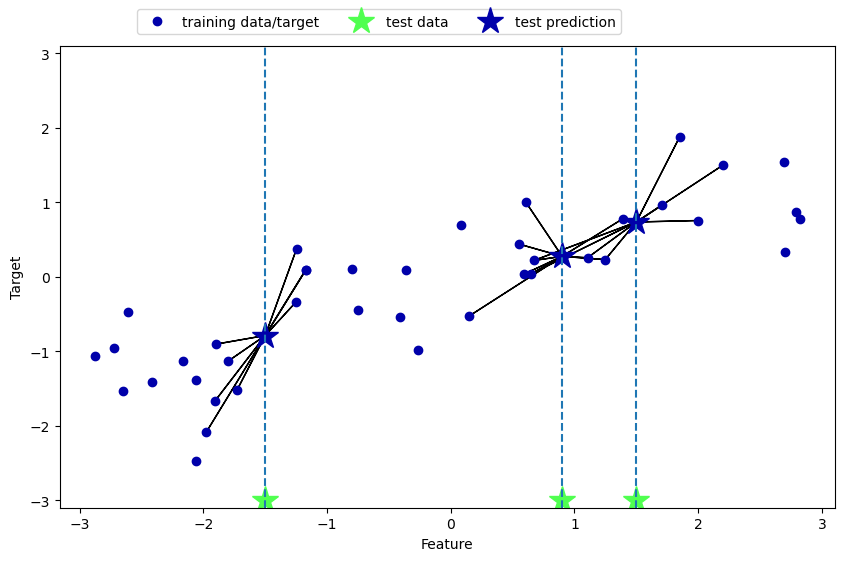

In [11]:
mglearn.plots.plot_knn_regression(n_neighbors=9)

In [8]:
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
print(reg.predict(X_test))
print(reg.score(X_test, y_test)) # 결정계수: R^2
print(f"Test set R^2: {reg.score(X_test, y_test):.2f}")

[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
0.8344172446249605
Test set R^2: 0.83


## KNeighborsRegressor: Number of Neighbors Comparison

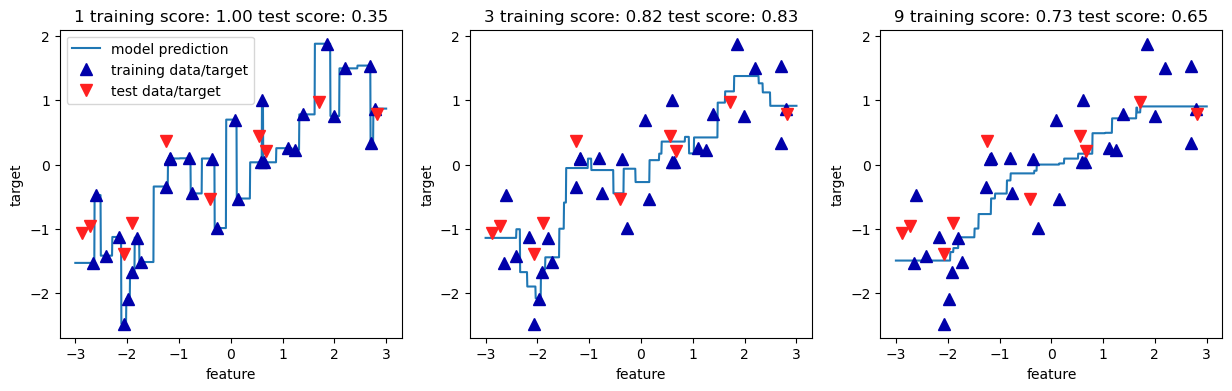

In [10]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title(
        f"{n_neighbors} training score: {reg.score(X_train, y_train):.2f} "
        + f"test score: {reg.score(X_test, y_test):.2f}")
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
    axes[0].legend(["model prediction", "training data/target", "test data/target"], loc="best")